In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_17_26/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_TimeTrack/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingInit",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_1StepBeforeFail_TrackTrainingInit",
                   workingDirectory + "/DataSet/"+"TrainingAug1Time_2StepBeforeFail_TrackTrainingInit",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/Rubbles_TimeTrack/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(12000, 85)
(12000, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  1
DataSet Sizes: 
(17362, 85)
(17362, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  2
DataSet Sizes: 
(22058, 85)
(22058, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(22058, 85)
(22058, 14)
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Validation

In [25]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)


input dim:  85
output dim: 14
 
[ 0.          0.1         0.75        0.          0.          0.
  0.          0.          0.          0.          0.2         0.
  1.          0.2         1.1         0.         -0.2         1.1
  0.         -0.2         0.1         0.          0.2         0.1
  0.          0.2         0.1         0.         -0.2         0.1
  0.         -0.2        -0.9         0.          0.2        -0.9
  0.          0.775       1.1         0.08634323  0.2         1.1
  0.08634323  0.2         0.1        -0.08634323  0.775       0.1
 -0.08634323  0.775       0.1        -0.08892003  0.2         0.1
 -0.08892003  0.2        -0.9         0.08892003  0.775      -0.9
  0.08892003  1.35        1.1         0.04757731  0.775       1.1
 -0.04757731  0.775       0.1        -0.04757731  1.35        0.1
  0.04757731  1.35        0.1         0.04310632  0.775       0.1
  0.04310632  0.775      -0.9        -0.04310632  1.35       -0.9
 -0.04310632]


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [10]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs =500, batch_size = 2560, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/500
9/9 [==============================] - 0s 11ms/step - loss: 7.9973e-04 - val_loss: 7.1176e-04
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 5.2025e-04 - val_loss: 5.8576e-04
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 4.3580e-04 - val_loss: 5.3382e-04
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 3.9568e-04 - val_loss: 5.1439e-04
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 3.8891e-04 - val_loss: 5.0398e-04
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7741e-04 - val_loss: 5.0488e-04
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7346e-04 - val_loss: 5.0283e-04
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6780e-04 - val_loss: 5.0396e-04
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6533e-04 - val_loss: 5.0409e-04
Epoch 10/500
9/9 [==============================] - 0s

9/9 [==============================] - 0s 6ms/step - loss: 3.6525e-04 - val_loss: 5.1113e-04
Epoch 79/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7230e-04 - val_loss: 5.2133e-04
Epoch 80/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7382e-04 - val_loss: 5.0927e-04
Epoch 81/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7130e-04 - val_loss: 5.0918e-04
Epoch 82/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6736e-04 - val_loss: 5.0531e-04
Epoch 83/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7571e-04 - val_loss: 5.4259e-04
Epoch 84/500
9/9 [==============================] - 0s 6ms/step - loss: 3.8513e-04 - val_loss: 5.2477e-04
Epoch 85/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7541e-04 - val_loss: 5.1871e-04
Epoch 86/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7329e-04 - val_loss: 5.1041e-04
Epoch 87/500
9/9 [==============================] - 0s 6ms/

Epoch 155/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7928e-04 - val_loss: 5.3683e-04
Epoch 156/500
9/9 [==============================] - 0s 7ms/step - loss: 3.8046e-04 - val_loss: 5.1391e-04
Epoch 157/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7084e-04 - val_loss: 5.1168e-04
Epoch 158/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7328e-04 - val_loss: 5.1398e-04
Epoch 159/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6928e-04 - val_loss: 5.0954e-04
Epoch 160/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6419e-04 - val_loss: 5.0672e-04
Epoch 161/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6915e-04 - val_loss: 5.1758e-04
Epoch 162/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7021e-04 - val_loss: 5.1665e-04
Epoch 163/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6942e-04 - val_loss: 5.0762e-04
Epoch 164/500
9/9 [==================

9/9 [==============================] - 0s 6ms/step - loss: 3.6418e-04 - val_loss: 5.0931e-04
Epoch 232/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6402e-04 - val_loss: 5.1270e-04
Epoch 233/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6534e-04 - val_loss: 5.1013e-04
Epoch 234/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6558e-04 - val_loss: 5.1738e-04
Epoch 235/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6499e-04 - val_loss: 5.2153e-04
Epoch 236/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7025e-04 - val_loss: 5.0763e-04
Epoch 237/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6784e-04 - val_loss: 5.1730e-04
Epoch 238/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6801e-04 - val_loss: 5.4707e-04
Epoch 239/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7363e-04 - val_loss: 5.1044e-04
Epoch 240/500
9/9 [==============================] 

9/9 [==============================] - 0s 6ms/step - loss: 3.5907e-04 - val_loss: 5.0773e-04
Epoch 308/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5918e-04 - val_loss: 5.0751e-04
Epoch 309/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5963e-04 - val_loss: 5.0673e-04
Epoch 310/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6200e-04 - val_loss: 5.1061e-04
Epoch 311/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6449e-04 - val_loss: 5.2209e-04
Epoch 312/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6998e-04 - val_loss: 5.0777e-04
Epoch 313/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6061e-04 - val_loss: 5.2204e-04
Epoch 314/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7078e-04 - val_loss: 5.1078e-04
Epoch 315/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6233e-04 - val_loss: 5.1246e-04
Epoch 316/500
9/9 [==============================] 

9/9 [==============================] - 0s 6ms/step - loss: 3.6702e-04 - val_loss: 5.1389e-04
Epoch 384/500
9/9 [==============================] - 0s 6ms/step - loss: 3.7135e-04 - val_loss: 5.0932e-04
Epoch 385/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6285e-04 - val_loss: 5.1078e-04
Epoch 386/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6247e-04 - val_loss: 5.1665e-04
Epoch 387/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6147e-04 - val_loss: 5.1757e-04
Epoch 388/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6002e-04 - val_loss: 5.0891e-04
Epoch 389/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5842e-04 - val_loss: 5.0926e-04
Epoch 390/500
9/9 [==============================] - 0s 6ms/step - loss: 3.6537e-04 - val_loss: 5.0812e-04
Epoch 391/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5924e-04 - val_loss: 5.1253e-04
Epoch 392/500
9/9 [==============================] 

9/9 [==============================] - 0s 6ms/step - loss: 3.5634e-04 - val_loss: 5.0884e-04
Epoch 460/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5865e-04 - val_loss: 5.0889e-04
Epoch 461/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5608e-04 - val_loss: 5.1388e-04
Epoch 462/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5957e-04 - val_loss: 5.0824e-04
Epoch 463/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5815e-04 - val_loss: 5.1215e-04
Epoch 464/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5921e-04 - val_loss: 5.0963e-04
Epoch 465/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5569e-04 - val_loss: 5.0867e-04
Epoch 466/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5604e-04 - val_loss: 5.1026e-04
Epoch 467/500
9/9 [==============================] - 0s 6ms/step - loss: 3.5799e-04 - val_loss: 5.0877e-04
Epoch 468/500
9/9 [==============================] 

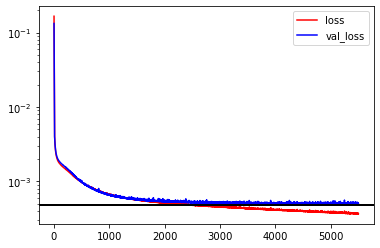

0.0005083055002614856


In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.axhline(y=0.00049, xmin=0, xmax=5, linewidth=2, color = 'k')
plt.show()
print(history.history['val_loss'][-1])

In [9]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "Aug_1Time"
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/Rubbles_TimeTrack//ML_Models/NN_Model_Aug_1Time/assets


In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]

datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [23]:
#Show Prediction Result for Training
from sklearn import preprocessing
import time

datapoint_num = 105

x_test = np.array([x_train[datapoint_num]])

start = time.time()
y_pred_temp = model.predict(x_test)
end = time.time()

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))


print("Neural Network Time: ", end - start)

[-2.57735119e-01 -1.32431439e-01  7.72655379e-01  1.54205458e-01
  1.45736733e-01  1.94858307e-02  5.27221104e-06  9.07316125e-07
 -3.21963525e-05 -3.04132597e-01 -2.39602974e-01 -6.31444340e-03
  0.00000000e+00  4.30208398e-01  8.88343776e-01 -2.95208302e-13
 -1.54664427e-01  8.88343776e-01 -2.95208302e-13 -1.54664427e-01
 -1.11656224e-01 -2.95208302e-13  4.30208398e-01 -1.11656224e-01
 -2.95208302e-13 -1.63228795e-01 -1.11656224e-01  4.60190034e-02
 -7.28522625e-01 -1.11656224e-01 -5.91850123e-02 -6.91814896e-01
 -1.11165622e+00 -2.56427035e-01 -1.26521066e-01 -1.11165622e+00
 -1.51223019e-01  4.11768022e-01 -1.11656224e-01  9.90858626e-02
 -1.36224052e-01 -1.11656224e-01 -9.90858626e-02 -1.36224052e-01
 -1.11165622e+00 -9.90858626e-02  4.11768022e-01 -1.11165622e+00
  9.90858626e-02  9.67834214e-01  8.88343776e-01  2.53872845e-01
  4.02540384e-01  8.88343776e-01  1.48668830e-01  4.38297418e-01
 -1.11656224e-01 -4.34648140e-02  1.00359125e+00 -1.11656224e-01
  6.17392016e-02  9.67834

Data Kept Original Form, But need to scale back to meters
[0.11825266 0.11826868 0.11836202 0.11838948 0.11850782 0.1185395
 0.11863828 0.11870088 0.11877728 0.11884707 0.11889283 0.11899191
 0.11906562 0.11911687 0.11915405 0.11916729 0.11917685 0.11923776
 0.11927909 0.11928111 0.11928465 0.11931716 0.11935407 0.11936446
 0.11945982 0.11946369 0.11948838 0.11954073 0.119545   0.11958719
 0.11962969 0.11992856 0.11993253 0.1199427  0.1199954  0.12011347
 0.12013547 0.12014177 0.12014191 0.12015071 0.12017513 0.12028507
 0.12034187 0.1203751  0.120401   0.12041368 0.12046182 0.12049302
 0.12055    0.12059079 0.12079847 0.12086058 0.12089985 0.12094128
 0.12096764 0.12103329 0.12106263 0.12110893 0.1211318  0.12118288
 0.12119687 0.12128399 0.1213223  0.12132901 0.12134058 0.12134582
 0.12158157 0.12163898 0.12163997 0.12171688 0.12173013 0.12179118
 0.12181813 0.12182113 0.12204731 0.12206968 0.1220828  0.12244637
 0.12246588 0.12258644 0.1226016  0.12261158 0.1226371  0.12271067
 0.12

(array([2., 1., 6., 3., 4., 1., 7., 4., 9., 2., 6., 3., 7., 4., 5., 1., 2.,
        3., 5., 3., 1., 2., 3., 0., 5., 1., 2., 4., 3., 1.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <BarContainer object of 30 artists>)

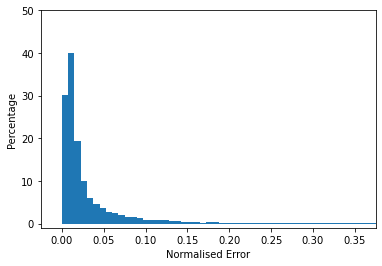

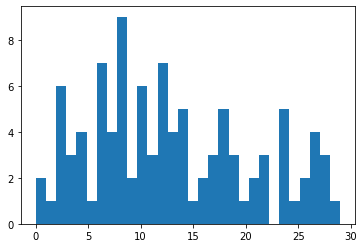

In [20]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
#err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)
err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.00614227 0.00661179 0.00720222 ... 0.60391711 0.60718226 0.71030494]
Error Mean:  0.06056017807312267
Error Std 0.059227855889654304


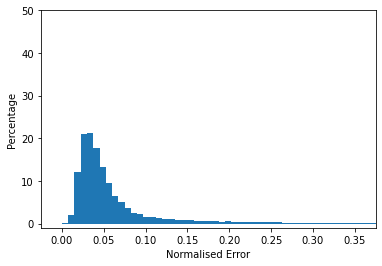

In [21]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.03204468 0.03336783 0.03373591 ... 1.31811443 1.34487174 1.34515033]
Error Mean:  0.7922294691242362
Error Std 0.37025940508621985


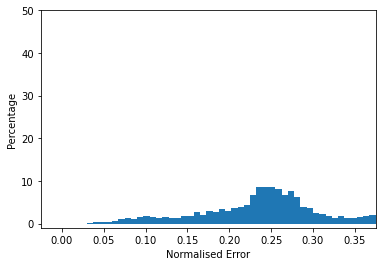

In [22]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())